<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regularization**

# Importing Libraries

In [23]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Loading Dataset

In [24]:
#Loading Dataset
df = pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [25]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

# EDA/Data Cleaning

In [26]:
#dropping unnecessary columns
df.drop("Unnamed: 0",axis=1,inplace=True)

In [27]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
#after handing missing values
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [30]:
#splitting the data

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# Multiple Regression Model

In [32]:
#Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

#Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

#calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

#Putting together the coefficient and their corrsponding variable names
reg_coefficient = pd.DataFrame()
reg_coefficient["Columns"] = x_train.columns
reg_coefficient['Normal_Reg_Coeff'] = pd.Series(lreg.coef_)
reg_coefficient

Mean squared Error on test set :  34.41396845313842


,Columns,Normal_Reg_Coeff
0,crim,-0.128181
1,zn,0.063198
2,indus,-0.007576
3,chas,1.974515
4,nox,-16.271989
5,rm,3.108456
6,age,0.016292
7,dis,-1.483014
8,rad,0.303988
9,tax,-0.012082


<Axes: xlabel='Normal_Reg_Coeff', ylabel='Columns'>

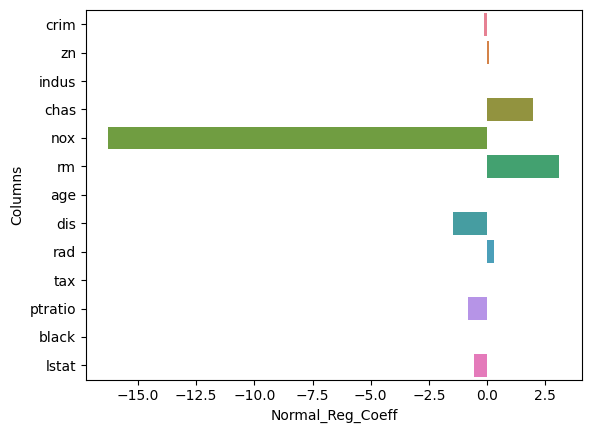

In [33]:
#barplot for regression coefficients
sns.barplot(x='Normal_Reg_Coeff' , y='Columns', data=reg_coefficient, hue='Columns')

# Ridge Regression Model

In [34]:
#import ridge regression from sklearn library
from sklearn.linear_model import Ridge

#Train the model
ridgeR = Ridge(alpha = 30)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

#calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

#get ridge coefficient and print them
#ridge_coefficient = pd.DataFrame()
#ridge_coefficient["Columns"]= x_train.columns
reg_coefficient['Ridge_Reg_Coeff'] = pd.Series(ridgeR.coef_)
reg_coefficient

37.88534720612197


,Columns,Normal_Reg_Coeff,Ridge_Reg_Coeff
0,crim,-0.128181,-0.123463
1,zn,0.063198,0.067830
2,indus,-0.007576,-0.069707
3,chas,1.974515,0.836876
4,nox,-16.271989,-0.658204
5,rm,3.108456,2.593284
6,age,0.016292,0.008080
7,dis,-1.483014,-1.233914
8,rad,0.303988,0.287617
9,tax,-0.012082,-0.014116


# Lasso Regression Model

In [35]:
#import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print(mean_squared_error)
print("Mean squared error on test set", mean_squared_error)

# lasso_coeff = pd.DataFrame()
# lasso_coeff["Columns"] = x_train.columns
reg_coefficient['Lasso_reg_Coeff'] = pd.Series(lasso.coef_)
reg_coefficient

48.62927545099278
Mean squared error on test set 48.62927545099278


,Columns,Normal_Reg_Coeff,Ridge_Reg_Coeff,Lasso_reg_Coeff
0,crim,-0.128181,-0.123463,-0.088170
1,zn,0.063198,0.067830,0.069682
2,indus,-0.007576,-0.069707,-0.007353
3,chas,1.974515,0.836876,0.000000
4,nox,-16.271989,-0.658204,-0.000000
5,rm,3.108456,2.593284,0.161862
6,age,0.016292,0.008080,0.035206
7,dis,-1.483014,-1.233914,-0.699412
8,rad,0.303988,0.287617,0.268211
9,tax,-0.012082,-0.014116,-0.015352


# Elastic Net Model

In [36]:
#import ElasticNet model
from sklearn.linear_model import ElasticNet

#Train the model
e_net = ElasticNet(alpha = 1,l1_ratio=.5)
e_net.fit(x_train, y_train)

#calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

#e_net_coeff = pd.DataFrame()
#e_net_coeff["Columns"] = x_train.columns
reg_coefficient['Elastic_Reg_Coeff'] = pd.Series(e_net.coef_)
reg_coefficient

Mean Squared Error on test set 46.16722692004988


,Columns,Normal_Reg_Coeff,Ridge_Reg_Coeff,Lasso_reg_Coeff,Elastic_Reg_Coeff
0,crim,-0.128181,-0.123463,-0.088170,-0.102786
1,zn,0.063198,0.067830,0.069682,0.068520
2,indus,-0.007576,-0.069707,-0.007353,-0.031960
3,chas,1.974515,0.836876,0.000000,0.000000
4,nox,-16.271989,-0.658204,-0.000000,-0.000000
5,rm,3.108456,2.593284,0.161862,0.663087
6,age,0.016292,0.008080,0.035206,0.032567
7,dis,-1.483014,-1.233914,-0.699412,-0.769546
8,rad,0.303988,0.287617,0.268211,0.287908
9,tax,-0.012082,-0.014116,-0.015352,-0.015390
